In [6]:
# Supress unnecessary warnings

import warnings
warnings.filterwarnings('ignore')

In [7]:
# Import the NumPy and Pandas packages

import numpy as np
import pandas as pd

In [8]:
# Read the dataset

leads = pd.read_csv('Leads.csv')

In [9]:
# Look at the first few entries


leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [10]:
# Inspect the shape of the dataset

leads.shape

(9240, 37)

In [11]:
# Inspect the different columsn in the dataset

leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

As you can see, the feature variables are quite intuitive. If you don't understand them completely, please refer to the data dictionary.

In [12]:
# Check the summary of the dataset
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [13]:
# Check the info to see the types of the feature variables and the null values present

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

Looks like there are quite a few categorical variables present in this dataset for which we will need to create dummy variables. Also, there are a lot of null values present as well, so we will need to treat them accordingly.

## Step 1: Data Cleaning and Preparation

In [14]:
# Check the number of missing values in each column

leads.isnull().sum().sort_values(ascending=False)
# sort_values descending order

,0
Lead Quality,4767
Asymmetrique Activity Index,4218
Asymmetrique Profile Score,4218
Asymmetrique Activity Score,4218
Asymmetrique Profile Index,4218
Tags,3353
Lead Profile,2709
What matters most to you in choosing a course,2709
What is your current occupation,2690
Country,2461


As you can see there are a lot of columns which have high number of missing values. Clearly, these columns are not useful. Since, there are 9000 datapoints in our dataframe, let's eliminate the columns having greater than 3000 missing values as they are of no use to us.

In [15]:
# Drop all the columns in which greater than 3000 missing values are present

for col in leads.columns:
    if leads[col].isna().sum() > 3000:
        leads.drop(col, axis=1, inplace=True)

In [16]:
# Check the number of null values again
leads.isnull().sum().sort_values(ascending=False)

,0
What matters most to you in choosing a course,2709
Lead Profile,2709
What is your current occupation,2690
Country,2461
How did you hear about X Education,2207
Specialization,1438
City,1420
Page Views Per Visit,137
TotalVisits,137
Last Activity,103


As you might be able to interpret, the variable `City` won't be of any use in our analysis. So it's best that we drop it.

In [17]:
# As per my understanding , as its a online platform the geography from which the student hails , is of no use
#so we drop city and country
leads.drop('City', axis=1, inplace=True)

In [18]:
# Same goes for the variable 'Country'
leads.drop('Country', axis=1, inplace=True)

In [19]:
# Let's now check the percentage of missing values in each column

missing_percentage = (leads.isna().sum() / leads.shape[0]) * 100
sorted_missing_percentage = missing_percentage.sort_values(ascending=False)


In [20]:
sorted_missing_percentage

,0
What matters most to you in choosing a course,29.318182
Lead Profile,29.318182
What is your current occupation,29.112554
How did you hear about X Education,23.885281
Specialization,15.562771
TotalVisits,1.482684
Page Views Per Visit,1.482684
Last Activity,1.114719
Lead Source,0.389610
Get updates on DM Content,0.000000


In [21]:
# Check the number of null values again

leads.isnull().sum().sort_values(ascending=False)

,0
What matters most to you in choosing a course,2709
Lead Profile,2709
What is your current occupation,2690
How did you hear about X Education,2207
Specialization,1438
TotalVisits,137
Page Views Per Visit,137
Last Activity,103
Lead Source,36
Get updates on DM Content,0


Now recall that there are a few columns in which there is a level called 'Select' which basically means that the student had not selected the option for that particular column which is why it shows 'Select'. These values are as good as missing values and hence we need to identify the value counts of the level 'Select' in all the columns that it is present.

In [22]:
for col in leads.columns:
    print(f"Value counts for column '{col}':")
    print(leads[col].value_counts())
    print()  # For better readability


Value counts for column 'Prospect ID':
Prospect ID
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: count, Length: 9240, dtype: int64

Value counts for column 'Lead Number':
Lead Number
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: count, Length: 9240, dtype: int64

Value counts for column 'Lead Origin':
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count

The following three columns now have the level 'Select'. Let's check them once again.

In [23]:
leads['Lead Profile'].value_counts()

,count
Lead Profile,
Select,4146
Potential Lead,1613
Other Leads,487
Student of SomeSchool,241
Lateral Student,24
Dual Specialization Student,20


In [24]:
leads['How did you hear about X Education'].value_counts()

,count
How did you hear about X Education,
Select,5043
Online Search,808
Word Of Mouth,348
Student of SomeSchool,310
Other,186
Multiple Sources,152
Advertisements,70
Social Media,67
Email,26


In [25]:
leads['Specialization'].value_counts()

,count
Specialization,
Select,1942
Finance Management,976
Human Resource Management,848
Marketing Management,838
Operations Management,503
Business Administration,403
IT Projects Management,366
Supply Chain Management,349
"Banking, Investment And Insurance",338


Clearly the levels `Lead Profile` and `How did you hear about X Education` have a lot of rows which have the value `Select` which is of no use to the analysis so it's best that we drop them.

In [26]:
leads.drop(['Lead Profile', 'How did you hear about X Education'], axis=1, inplace=True)


Also notice that when you got the value counts of all the columns, there were a few columns in which only one value was majorly present for all the data points. These include `Do Not Call`, `Search`, `Magazine`, `Newspaper Article`, `X Education Forums`, `Newspaper`, `Digital Advertisement`, `Through Recommendations`, `Receive More Updates About Our Courses`, `Update me on Supply Chain Content`, `Get updates on DM Content`, `I agree to pay the amount through cheque`. Since practically all of the values for these variables are `No`, it's best that we drop these columns as they won't help with our analysis.

In [27]:
columns_to_drop = [
    'Do Not Call',
    'Search',
    'Magazine',
    'Newspaper Article',
    'X Education Forums',
    'Newspaper',
    'Digital Advertisement',
    'Through Recommendations',
    'Receive More Updates About Our Courses',
    'Update me on Supply Chain Content',
    'Get updates on DM Content',
    'I agree to pay the amount through cheque'
]

leads.drop(columns=columns_to_drop, axis=1, inplace=True)


Also, the variable `What matters most to you in choosing a course` has the level `Better Career Prospects` `6528` times while the other two levels appear once twice and once respectively. So we should drop this column as well.

In [28]:
leads['What matters most to you in choosing a course'].value_counts()

,count
What matters most to you in choosing a course,
Better Career Prospects,6528
Flexibility & Convenience,2
Other,1


In [29]:
# Drop the null value rows present in the variable 'What matters most to you in choosing a course'
leads.drop('What matters most to you in choosing a course', axis=1, inplace=True)


In [30]:
# Check the number of null values again

leads.isnull().sum().sort_values(ascending=False)

,0
What is your current occupation,2690
Specialization,1438
TotalVisits,137
Page Views Per Visit,137
Last Activity,103
Lead Source,36
Prospect ID,0
Lead Number,0
Lead Origin,0
Do Not Email,0


Now, there's the column `What is your current occupation` which has a lot of null values. Now you can drop the entire row but since we have already lost so many feature variables, we choose not to drop it as it might turn out to be significant in the analysis. So let's just drop the null rows for the column `What is you current occupation`.

In [31]:
leads = leads[ ~pd.isnull(leads['What is your current occupation']) ]

In [32]:
# Check the number of null values again
leads.isnull().sum().sort_values(ascending=False)


,0
TotalVisits,130
Page Views Per Visit,130
Last Activity,103
Lead Source,36
Specialization,18
Prospect ID,0
Lead Number,0
Lead Origin,0
Do Not Email,0
Converted,0


Since now the number of null values present in the columns are quite small we can simply drop the rows in which these null values are present.

In [33]:
# Drop the null value rows in the column 'TotalVisits'
leads = leads[ ~pd.isnull(leads['TotalVisits']) ]


In [34]:
# Check the null values again

leads.isnull().sum().sort_values(ascending=False)

,0
Lead Source,29
Specialization,18
Prospect ID,0
Lead Number,0
Lead Origin,0
Do Not Email,0
Converted,0
TotalVisits,0
Total Time Spent on Website,0
Page Views Per Visit,0


In [35]:
# Drop the null values rows in the column 'Lead Source'

leads = leads[ ~pd.isnull(leads['Lead Source']) ]

In [36]:
# Check the number of null values again

leads.isnull().sum().sort_values(ascending=False)

,0
Specialization,18
Prospect ID,0
Lead Number,0
Lead Origin,0
Lead Source,0
Do Not Email,0
Converted,0
TotalVisits,0
Total Time Spent on Website,0
Page Views Per Visit,0


In [37]:
# Drop the null values rows in the column 'Specialization'

leads = leads[ ~pd.isnull(leads['Specialization']) ]

In [38]:
# Check the number of null values again

leads.isnull().sum().sort_values(ascending=False)

,0
Prospect ID,0
Lead Number,0
Lead Origin,0
Lead Source,0
Do Not Email,0
Converted,0
TotalVisits,0
Total Time Spent on Website,0
Page Views Per Visit,0
Last Activity,0


Now your data doesn't have any null values. Let's now check the percentage of rows that we have retained.

In [39]:
print(len(leads.index))
print(len(leads.index)/9240)

6373
0.6897186147186147


We still have around 69% of the rows which seems good enough.

In [40]:
# Let's look at the dataset again

leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


Now, clearly the variables `Prospect ID` and `Lead Number` won't be of any use in the analysis, so it's best that we drop these two variables.

In [41]:
leads.drop(['Prospect ID','Lead Number'],axis=1,inplace=True)

In [42]:
leads.head()


,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


### Dummy variable creation

The next step is to deal with the categorical variables present in the dataset. So first take a look at which variables are actually categorical variables.

In [43]:
# Check the columns which are of type 'object'
temp = leads.loc[:, leads.dtypes == 'object']
temp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [44]:
# Create dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview',
                              'Last Notable Activity','Specialization']], drop_first=True, dtype=int)

# Add the results to the master dataframe
leads = pd.concat([leads, dummy], axis=1)

In [45]:
dummy.columns

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn',
       'Lead Source_Welingak Website', 'Lead Source_bing',
       'Lead Source_testone', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last A

In [46]:
leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn',
       'Lead Source_Welingak Website', 'Lead Source_bing',
       'Lead Source_testone', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activi

In [47]:
print('Specialization_Select' in leads.columns)


True


In [48]:
leads.drop( 'Specialization_Select',axis=1,inplace=True)

In [49]:
# Drop the variables for which the dummy variables have been created

leads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'],axis=1,inplace=True)

In [50]:
# Let's take a look at the dataset again

leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [51]:
leads.columns

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_Welingak Website',
       'Lead Source_bing', 'Lead Source_testone', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last 

### Test-Train Split

The next step is to split the dataset into training an testing sets.

In [52]:
# Import the required library

from sklearn.model_selection import train_test_split

In [53]:
# Put all the feature variables in X

X = leads.drop('Converted', axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
# Put the target variable in y

y = leads['Converted']
y.head()

,Converted
0,0
1,0
2,1
3,0
4,1


In [55]:
# Split the dataset into 70% train and 30% test, and set the random state to 100

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Check the shape of the train dataset and the test dataset
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4461, 73)
(1912, 73)
(4461,)
(1912,)


### Scaling

Now there are a few numeric variables present in the dataset which have different scales. So let's go ahead and scale these variables.

In [56]:
# Import MinMax scaler

from sklearn.preprocessing import MinMaxScaler

In [57]:
# Initialize the scaler
scaler = MinMaxScaler()

# Specify the columns to scale
columns_to_scale = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

# Fit the scaler on the data and transform the specified columns
leads[columns_to_scale] = scaler.fit_transform(leads[columns_to_scale])

# Optional: Check the scaled values
print(leads[columns_to_scale].head())



   TotalVisits  Total Time Spent on Website  Page Views Per Visit
0     0.000000                     0.000000              0.000000
1     0.019920                     0.296655              0.045455
2     0.007968                     0.674296              0.036364
3     0.003984                     0.134243              0.018182
4     0.007968                     0.628521              0.018182


### Looking at the correlations

Let's now look at the correlations. Since the number of variables are pretty high, it's better that we look at the table instead of plotting a heatmap

In [58]:
# Looking at the correlation table

leads.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
Converted,1.000000,0.005651,0.313338,-0.063362,-0.117563,0.288666,-0.019269,-0.133600,-0.021207,0.020205,...,-0.005689,-0.024789,0.049520,-0.000862,0.031349,-0.018603,0.006964,-0.005142,0.005785,-0.011762
TotalVisits,0.005651,1.000000,0.202551,0.489039,0.267954,-0.208375,-0.043000,0.075252,-0.042052,0.085306,...,0.025182,0.028630,-0.000493,0.038725,0.008929,0.014223,0.068015,0.015114,0.063383,0.064384
Total Time Spent on Website,0.313338,0.202551,1.000000,0.303870,0.275606,-0.249493,-0.061429,0.114088,-0.060945,0.227496,...,0.025526,0.011056,0.052437,0.043356,0.050860,0.024919,0.018767,0.003203,0.045386,0.037867
Page Views Per Visit,-0.063362,0.489039,0.303870,1.000000,0.458168,-0.340185,-0.065739,0.109785,-0.062896,0.183735,...,0.062421,0.057990,0.017799,0.063772,0.030364,0.026099,0.027465,0.015230,0.052972,0.111284
Lead Origin_Landing Page Submission,-0.117563,0.267954,0.275606,0.458168,1.000000,-0.363764,-0.074917,0.508857,-0.071507,0.067225,...,0.133206,0.089105,0.084975,0.093730,0.095849,0.070983,0.050077,0.039433,0.111610,0.094875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Specialization_Retail Management,-0.018603,0.014223,0.024919,0.026099,0.070983,-0.025339,-0.007261,0.022168,-0.007395,0.021190,...,-0.023773,-0.016437,-0.037930,-0.017920,-0.028459,1.000000,-0.010668,-0.006986,-0.023639,-0.017223
Specialization_Rural and Agribusiness,0.006964,0.068015,0.018767,0.027465,0.050077,-0.018872,-0.006251,0.021596,-0.006366,-0.037642,...,-0.020467,-0.014152,-0.032656,-0.015429,-0.024501,-0.010668,1.000000,-0.006014,-0.020352,-0.014828
Specialization_Services Excellence,-0.005142,0.015114,0.003203,0.015230,0.039433,-0.011155,-0.004093,0.053189,-0.004169,-0.027058,...,-0.013403,-0.009267,-0.021384,-0.010103,-0.016044,-0.006986,-0.006014,1.000000,-0.013327,-0.009710
Specialization_Supply Chain Management,0.005785,0.063383,0.045386,0.052972,0.111610,-0.035065,-0.001963,0.093536,-0.002431,-0.027074,...,-0.045353,-0.031358,-0.072362,-0.034188,-0.054292,-0.023639,-0.020352,-0.013327,1.000000,-0.032857


## Step 2: Model Building

Let's now move to model building. As you can see that there are a lot of variables present in the dataset which we cannot deal with. So the best way to approach this is to select a small set of features from this pool of variables using RFE.

In [59]:
# Import 'LogisticRegression' and create a LogisticRegression object "logreg"
from sklearn.linear_model import LogisticRegression

# Create a LogisticRegression object
logreg = LogisticRegression()


In [60]:
# Import RFE and select 15 variables
from sklearn.feature_selection import RFE

In [61]:



# Create the RFE object with the Logistic Regression estimator
rfe = RFE(estimator=logreg, n_features_to_select=15)

# Fit RFE to your data (assuming X is your feature DataFrame and y is your target variable)
rfe.fit(X_train, y_train)

# To get the selected features
selected_features = X_train.columns[rfe.support_]
print(selected_features)


Index(['Lead Origin_Lead Add Form', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_SMS Sent', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')


In [62]:
# Fit RFE on the training data
rfe.fit(X_train, y_train)

# Get feature rankings
feature_ranking = rfe.ranking_

# Create a DataFrame to display features and their rankings
features_with_ranking = pd.DataFrame({
    'Feature': X_train.columns,
    'Ranking': feature_ranking
})

# Sort the DataFrame by ranking
features_with_ranking = features_with_ranking.sort_values(by='Ranking')

# Display the features with their rankings
print(features_with_ranking)


                                    Feature  Ranking
49           Last Notable Activity_Modified        1
23              Last Activity_Email Bounced        1
21                         Do Not Email_Yes        1
29   Last Activity_Had a Phone Conversation        1
18             Lead Source_Welingak Website        1
..                                      ...      ...
13                Lead Source_Press_Release       55
16                 Lead Source_Social Media       56
25          Last Activity_Email Marked Spam       57
45  Last Notable Activity_Email Marked Spam       58
47     Last Notable Activity_Email Received       59

[73 rows x 2 columns]


In [63]:
# Put all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]

Now you have all the variables selected by RFE and since we care about the statistics part, i.e. the p-values and the VIFs, let's use these variables to create a logistic regression model using statsmodels.

In [64]:
# Select only the columns selected by RFE

X_train = X_train[col]

In [65]:
# Import statsmodels

import statsmodels.api as sm

In [66]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2379.8
Date:                Tue, 22 Oct 2024   Deviance:                       4759.7
Time:                        12:53:37   Pearson chi2:                 4.63e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.2724
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.0723      0.570      1.883      0.060      -0.044       2.189
Lead Origin_Lead Add Form                                2.0103      1.172      1.715      0.086      -0.287       4.307
Lead Source_Reference                                    0.8066      1.198      0.673      0.501      -1.541       3.154
Lead Source_Welingak Website                             2.8259      1.545      1.829      0.067      -0.203       5.855
Do Not Email_Yes                                        -1.4343      0.201     -7.141      0.000      -1.828      -1.041
Last Activity_Email Bounced                             -0.9756      0.625     -1.560      0.119      -2.202       0.250
Last Activity_Had a Phone Conversation                   1.8110      0.894      2.027      0.043       0.060       3.562
Last Activity_SMS Sent                                   1.0171      0.077     13.285      0.000       0.867       1.167
What is your current occupation_Housewife               22.3655   2.51e+04      0.001      0.999   -4.92e+04    4.92e+04
What is your current occupation_Student                 -1.3894      0.602     -2.309      0.021      -2.569      -0.210
What is your current occupation_Unemployed              -1.5567      0.571     -2.728      0.006      -2.675      -0.438
What is your current occupation_Working Professional     1.1284      0.599      1.883      0.060      -0.046       2.303
Last Notable Activity_Email Bounced                      1.3512      0.758      1.782      0.075      -0.135       2.837
Last Notable Activity_Had a Phone Conversation          22.0656   2.42e+04      0.001      0.999   -4.74e+04    4.74e+04
Last Notable Activity_Modified                          -0.8527      0.082    -10.397      0.000      -1.014      -0.692
Last Notable Activity_Unreachable                        2.0478      0.776      2.638      0.008       0.527       3.569
========================================================================================================================
"""

There are quite a few variable which have a p-value greater than `0.05`. We will need to take care of them. But first, let's also look at the VIFs.

In [67]:
# Import 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [68]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Origin_Lead Add Form,84.13
1,Lead Source_Reference,65.12
2,Lead Source_Welingak Website,20.01
5,Last Activity_Had a Phone Conversation,2.45
12,Last Notable Activity_Had a Phone Conversation,2.44
9,What is your current occupation_Unemployed,2.21
4,Last Activity_Email Bounced,1.99
6,Last Activity_SMS Sent,1.69
3,Do Not Email_Yes,1.64
13,Last Notable Activity_Modified,1.62


VIFs seem to be in a decent range except for three variables.

Let's first drop the variable `Lead Source_Reference` since it has a high p-value as well as a high VIF.

In [69]:
X_train.drop('Lead Source_Reference', axis = 1, inplace = True)

In [70]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2380.0
Date:                Tue, 22 Oct 2024   Deviance:                       4760.1
Time:                        12:53:37   Pearson chi2:                 4.61e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.2723
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.0728      0.570      1.884      0.060      -0.043       2.189
Lead Origin_Lead Add Form                                2.7884      0.247     11.280      0.000       2.304       3.273
Lead Source_Welingak Website                             2.0477      1.037      1.974      0.048       0.015       4.080
Do Not Email_Yes                                        -1.4332      0.201     -7.140      0.000      -1.827      -1.040
Last Activity_Email Bounced                             -0.9759      0.625     -1.560      0.119      -2.202       0.250
Last Activity_Had a Phone Conversation                   1.8116      0.894      2.027      0.043       0.060       3.563
Last Activity_SMS Sent                                   1.0173      0.077     13.289      0.000       0.867       1.167
What is your current occupation_Housewife               22.3657   2.51e+04      0.001      0.999   -4.92e+04    4.92e+04
What is your current occupation_Student                 -1.3891      0.602     -2.309      0.021      -2.568      -0.210
What is your current occupation_Unemployed              -1.5572      0.571     -2.729      0.006      -2.676      -0.439
What is your current occupation_Working Professional     1.1286      0.599      1.883      0.060      -0.046       2.303
Last Notable Activity_Email Bounced                      1.3503      0.758      1.781      0.075      -0.135       2.836
Last Notable Activity_Had a Phone Conversation          22.0650   2.42e+04      0.001      0.999   -4.74e+04    4.74e+04
Last Notable Activity_Modified                          -0.8534      0.082    -10.406      0.000      -1.014      -0.693
Last Notable Activity_Unreachable                        2.0482      0.776      2.639      0.008       0.527       3.569
========================================================================================================================
"""

In [71]:
X_train.drop('Lead Origin_Lead Add Form', axis = 1, inplace = True)

In [72]:
# Make a VIF dataframe for all the variables present



vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif



,Features,VIF
3,Last Activity_Had a Phone Conversation,2.45
10,Last Notable Activity_Had a Phone Conversation,2.44
7,What is your current occupation_Unemployed,2.19
2,Last Activity_Email Bounced,1.98
4,Last Activity_SMS Sent,1.68
1,Do Not Email_Yes,1.63
11,Last Notable Activity_Modified,1.62
9,Last Notable Activity_Email Bounced,1.41
8,What is your current occupation_Working Profes...,1.18
0,Lead Source_Welingak Website,1.03


In [73]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2495.0
Date:                Tue, 22 Oct 2024   Deviance:                       4989.9
Time:                        12:53:37   Pearson chi2:                 4.27e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.2339
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.1801      0.562      2.099      0.036       0.078       2.282
Lead Source_Welingak Website                             4.7055      1.008      4.666      0.000       2.729       6.682
Do Not Email_Yes                                        -1.3758      0.191     -7.215      0.000      -1.750      -1.002
Last Activity_Email Bounced                             -1.1768      0.626     -1.881      0.060      -2.403       0.050
Last Activity_Had a Phone Conversation                   1.6693      0.896      1.864      0.062      -0.086       3.425
Last Activity_SMS Sent                                   1.0405      0.075     13.948      0.000       0.894       1.187
What is your current occupation_Housewife               22.6211   2.75e+04      0.001      0.999   -5.39e+04     5.4e+04
What is your current occupation_Student                 -1.3512      0.592     -2.282      0.022      -2.512      -0.191
What is your current occupation_Unemployed              -1.5625      0.563     -2.775      0.006      -2.666      -0.459
What is your current occupation_Working Professional     1.2603      0.591      2.132      0.033       0.102       2.419
Last Notable Activity_Email Bounced                      1.3804      0.761      1.814      0.070      -0.111       2.871
Last Notable Activity_Had a Phone Conversation          22.0851    2.4e+04      0.001      0.999   -4.69e+04     4.7e+04
Last Notable Activity_Modified                          -0.8211      0.079    -10.402      0.000      -0.976      -0.666
Last Notable Activity_Unreachable                        2.1208      0.767      2.765      0.006       0.618       3.624
========================================================================================================================
"""

In [74]:
# Drop the specified variables from X_train
X_train = X_train.drop(columns=[
    'Last Activity_Email Bounced','What is your current occupation_Housewife',
    'Last Activity_Had a Phone Conversation',
    'Last Notable Activity_Email Bounced','Last Notable Activity_Had a Phone Conversation'
])


In [75]:


# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4452
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2509.7
Date:                Tue, 22 Oct 2024   Deviance:                       5019.3
Time:                        12:53:37   Pearson chi2:                 4.26e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2288
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.7246      0.523      3.300      0.001       0.700       2.749
Lead Source_Welingak Website                             4.7127      1.009      4.672      0.000       2.736       6.690
Do Not Email_Yes                                        -1.4778      0.169     -8.740      0.000      -1.809      -1.146
Last Activity_SMS Sent                                   1.0343      0.074     13.963      0.000       0.889       1.179
What is your current occupation_Student                 -1.8906      0.555     -3.409      0.001      -2.977      -0.804
What is your current occupation_Unemployed              -2.0895      0.523     -3.992      0.000      -3.115      -1.064
What is your current occupation_Working Professional     0.7317      0.553      1.323      0.186      -0.352       1.816
Last Notable Activity_Modified                          -0.8464      0.078    -10.850      0.000      -0.999      -0.693
Last Notable Activity_Unreachable                        2.0949      0.768      2.729      0.006       0.590       3.599
========================================================================================================================
"""

In [76]:
# Drop the specified variables from X_train
X_train = X_train.drop(columns=[
    'What is your current occupation_Working Professional'
])

In [77]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4453
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2510.5
Date:                Tue, 22 Oct 2024   Deviance:                       5020.9
Time:                        12:53:37   Pearson chi2:                 4.26e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2285
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          2.3897      0.176     13.557      0.000       2.044       2.735
Lead Source_Welingak Website                   4.7123      1.009      4.672      0.000       2.735       6.689
Do Not Email_Yes                              -1.4774      0.169     -8.750      0.000      -1.808      -1.146
Last Activity_SMS Sent                         1.0372      0.074     14.018      0.000       0.892       1.182
What is your current occupation_Student       -2.5560      0.255    -10.026      0.000      -3.056      -2.056
What is your current occupation_Unemployed    -2.7555      0.176    -15.674      0.000      -3.100      -2.411
Last Notable Activity_Modified                -0.8467      0.078    -10.854      0.000      -1.000      -0.694
Last Notable Activity_Unreachable              2.0906      0.768      2.722      0.006       0.585       3.596
==============================================================================================================
"""

In [78]:
result = logm1.fit()

In [79]:
# Extracting coefficients
coef_df = pd.DataFrame({'Feature': result.params.index, 'Coefficient': result.params.values})

# Sorting by absolute value of coefficients
coef_df['Absolute Coefficient'] = coef_df['Coefficient'].abs()
top_coefficients = coef_df.sort_values(by='Absolute Coefficient', ascending=False).head(6)

# Output the top coefficients
print("Top three coefficients:")
print(top_coefficients[['Feature', 'Coefficient']])

Top three coefficients:
                                      Feature  Coefficient
1                Lead Source_Welingak Website     4.712322
5  What is your current occupation_Unemployed    -2.755510
4     What is your current occupation_Student    -2.556026
0                                       const     2.389669
7           Last Notable Activity_Unreachable     2.090588
2                            Do Not Email_Yes    -1.477350


All the p-values are now in the appropriate range. Let's also check the VIFs again in case we had missed something.

In [80]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif





,Features,VIF
4,What is your current occupation_Unemployed,2.01
5,Last Notable Activity_Modified,1.48
2,Last Activity_SMS Sent,1.44
1,Do Not Email_Yes,1.08
0,Lead Source_Welingak Website,1.03
3,What is your current occupation_Student,1.02
6,Last Notable Activity_Unreachable,1.01


We are good to go!

## Step 3: Model Evaluation

Now, both the p-values and VIFs seem decent enough for all the variables. So let's go ahead and make predictions using this final set of features.

In [81]:
# Fit your model with the constant included, if it hasn't been done already
X_train_const = sm.add_constant(X_train)

# Fit the model again if needed (using X_train_const)
res = sm.Logit(y_train, X_train_const).fit()

# Now predict probabilities
y_train_pred = res.predict(X_train_const)

# Display the first 10 predicted probabilities
print(y_train_pred[:10])


Optimization terminated successfully.
         Current function value: 0.562755
         Iterations 9
8003    0.661816
218     0.229254
4171    0.229254
4037    0.409546
3660    0.661816
207     0.229254
2044    0.229254
6411    0.823898
6498    0.076534
2085    0.987213
dtype: float64


In [82]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.66181596, 0.22925434, 0.22925434, 0.40954644, 0.66181596,
       0.22925434, 0.22925434, 0.82389804, 0.07653448, 0.98721331])

#### Creating a dataframe with the actual conversion flag and the predicted probabilities

In [83]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.661816
1,0,0.229254
2,1,0.229254
3,1,0.409546
4,1,0.661816


#### Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0

In [84]:
# Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()


,Converted,Conversion_Prob,Predicted
0,0,0.661816,1
1,0,0.229254,0
2,1,0.229254,0
3,1,0.409546,0
4,1,0.661816,1


Now that you have the probabilities and have also made conversion predictions using them, it's time to evaluate the model.

In [85]:
# Import metrics from sklearn for evaluation

from sklearn import metrics

In [86]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [87]:
# Create confusion matrix

threshold = 0.5
y_train_pred_binary = np.where(y_train_pred > threshold, 1, 0)

# Step 3: Create the confusion matrix
cm = confusion_matrix(y_train, y_train_pred_binary)
cm


array([[1940,  372],
       [ 965, 1184]])

In [88]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.700291414481058


In [89]:
from sklearn.metrics import confusion_matrix


In [90]:
# Let's evaluate the other metrics as well

TP = cm[1,1] # true positive
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives

In [91]:
# Calculate the sensitivity

TP/(TP+FN)

0.550953932061424

In [92]:
# Calculate the specificity

TN/(TN+FP)

0.8391003460207612

### Finding the Optimal Cutoff

Now 0.5 was just arbitrary to loosely check the model performace. But in order to get good results, you need to optimise the threshold. So first let's plot an ROC curve to see what AUC we get.

In [93]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [94]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted,
                                         y_train_pred_final.Conversion_Prob, drop_intermediate = False )

In [95]:
# Import matplotlib to plot the ROC curve

import matplotlib.pyplot as plt

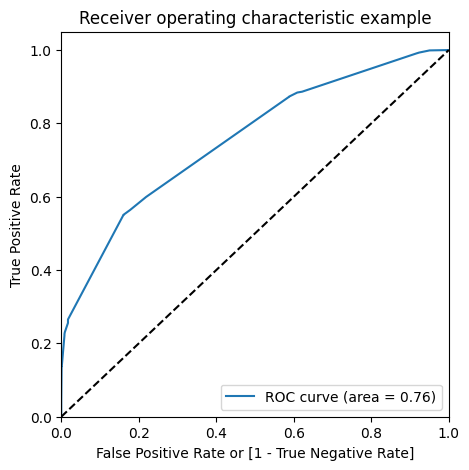

In [96]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under the curve of the ROC is 0.76 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [97]:
# Let's create columns with different probability cutoffs

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.661816,1,1,1,1,1,1,1,1,0,0,0
1,0,0.229254,0,1,1,1,0,0,0,0,0,0,0
2,1,0.229254,0,1,1,1,0,0,0,0,0,0,0
3,1,0.409546,0,1,1,1,1,1,0,0,0,0,0
4,1,0.661816,1,1,1,1,1,1,1,1,0,0,0


In [98]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at
# different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.481731  1.000000  0.000000
0.1   0.1  0.506837  0.999069  0.049308
0.2   0.2  0.519839  0.991624  0.081315
0.3   0.3  0.628559  0.884132  0.391003
0.4   0.4  0.633939  0.872499  0.412197
0.5   0.5  0.700291  0.550954  0.839100
0.6   0.6  0.700067  0.549558  0.839965
0.7   0.7  0.637077  0.265240  0.982699
0.8   0.8  0.631697  0.253141  0.983564
0.9   0.9  0.620937  0.221964  0.991782


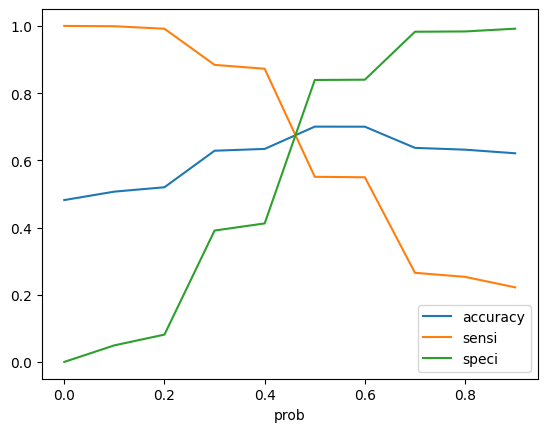

In [99]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

As you can see that around 0.42, you get the optimal values of the three metrics. So let's choose 0.42 as our cutoff now.

In [100]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.661816,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.229254,0,1,1,1,0,0,0,0,0,0,0,0
2,1,0.229254,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.409546,0,1,1,1,1,1,0,0,0,0,0,0
4,1,0.661816,1,1,1,1,1,1,1,1,0,0,0,1


In [101]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.6935664649181797

In [102]:
# Let's create the confusion matrix once again


threshold = 0.42
y_train_pred_binary = np.where(y_train_pred > threshold, 1, 0)

# Step 3: Create the confusion matrix
cm = confusion_matrix(y_train, y_train_pred_binary)
cm

array([[1806,  506],
       [ 861, 1288]])

In [103]:
# Let's evaluate the other metrics as well
TP = cm[1, 1]  # True Positives
TN = cm[0, 0]  # True Negatives
FP = cm[0, 1]  # False Positives
FN = cm[1, 0]  # False Negatives


In [104]:
# Calculate Sensitivity

TP/(TP+FN)

0.5993485342019544

In [105]:
# Calculate Specificity

TN/(TN+FP)

0.7811418685121108

This cutoff point seems good to go!

## Step 4: Making Predictions on the Test Set

Let's now make predicitons on the test set.

In [106]:
# Initialize the scaler
scaler = MinMaxScaler()

# Specify the columns to scale
columns_to_scale = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

# Fit the scaler on the data and transform the specified columns
leads[columns_to_scale] = scaler.fit_transform(leads[columns_to_scale])

# Optional: Check the scaled values
print(leads[columns_to_scale].head())

   TotalVisits  Total Time Spent on Website  Page Views Per Visit
0     0.000000                     0.000000              0.000000
1     0.019920                     0.296655              0.045455
2     0.007968                     0.674296              0.036364
3     0.003984                     0.134243              0.018182
4     0.007968                     0.628521              0.018182


In [107]:
# Select the columns in X_train for X_test as well

X_test = X_test[col]
X_test.head()

,Lead Origin_Lead Add Form,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Unreachable
4771,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0
6122,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
9202,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
6570,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
2668,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0


In [108]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test[col])

In [109]:
# Check X_test_sm

X_test_sm

,const,Lead Origin_Lead Add Form,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Unreachable
4771,1.0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0
6122,1.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
9202,1.0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
6570,1.0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
2668,1.0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5828,1.0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
6583,1.0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
5531,1.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3056,1.0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0


In [110]:
X_test.columns

Index(['Lead Origin_Lead Add Form', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_SMS Sent', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [111]:
X_train.columns

Index(['Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_SMS Sent', 'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [112]:
# Drop the required columns from X_test
X_test.drop(['Lead Source_Reference',
              'What is your current occupation_Housewife',
              'What is your current occupation_Working Professional',
              'Last Notable Activity_Had a Phone Conversation',],
             axis=1,
             inplace=True)


In [113]:
# Get the set of columns from both dataframes
train_columns = set(X_train.columns)
test_columns = set(X_test.columns)

# Find columns in X_test that are not in X_train
extra_columns_in_test = test_columns - train_columns

# Drop the extra columns from X_test
X_test = X_test.drop(columns=list(extra_columns_in_test), errors='ignore')

# Verify the remaining columns
print("Remaining columns in X_test:", X_test.columns)


Remaining columns in X_test: Index(['Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_SMS Sent', 'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')


In [114]:
X_test.columns

Index(['Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_SMS Sent', 'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [115]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [116]:
X_test_const = sm.add_constant(X_test)

# Make predictions on the test set
y_test_pred = res.predict(X_test_const)

# Display the first 10 predicted probabilities
print(y_test_pred[:10])

4771    0.968535
6122    0.409546
9202    0.661816
6570    0.308754
2668    0.456290
4233    0.875398
3368    0.409546
9091    0.409546
5972    0.456290
3631    0.661816
dtype: float64


In [117]:
y_test_pred[:10]

,0
4771,0.968535
6122,0.409546
9202,0.661816
6570,0.308754
2668,0.456290
4233,0.875398
3368,0.409546
9091,0.409546
5972,0.456290
3631,0.661816


In [118]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [119]:
# Let's see the head

y_pred_1.head()

,0
4771,0.968535
6122,0.409546
9202,0.661816
6570,0.308754
2668,0.456290


In [120]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [121]:
# Remove index for both dataframes to append them side by side

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [122]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [123]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,1,0.968535
1,0,0.409546
2,0,0.661816
3,1,0.308754
4,1,0.456290


In [124]:
# Rename the column

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [125]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.968535
1,0,0.409546
2,0,0.661816
3,1,0.308754
4,1,0.456290


In [126]:
# Make predictions on the test set using 0.45 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [127]:
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.968535,1
1,0,0.409546,0
2,0,0.661816,1
3,1,0.308754,0
4,1,0.456290,1


In [128]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.6961297071129707

In [129]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[764, 232],
       [349, 567]])

In [130]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [131]:
# Calculate sensitivity
TP / float(TP+FN)

0.618995633187773

In [132]:
# Calculate specificity
TN / float(TN+FP)

0.7670682730923695

## Precision-Recall View

Let's now also build the training model using the precision-recall view

In [133]:
#Looking at the confusion matrix again

In [134]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[1940,  372],
       [ 965, 1184]])

##### Precision
TP / TP + FP

In [135]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7609254498714653

##### Recall
TP / TP + FN

In [136]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.550953932061424

### Precision and recall tradeoff

In [137]:
from sklearn.metrics import precision_recall_curve

In [138]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4456    1
 4457    0
 4458    0
 4459    0
 4460    0
 Name: Converted, Length: 4461, dtype: int64,
 0       1
 1       0
 2       0
 3       0
 4       1
        ..
 4456    1
 4457    0
 4458    1
 4459    0
 4460    1
 Name: Predicted, Length: 4461, dtype: int64)

In [139]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

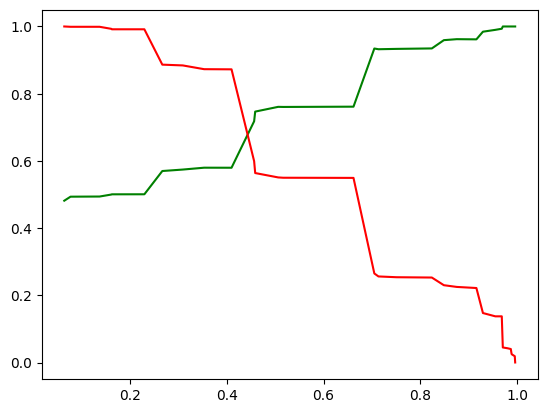

In [140]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [141]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.661816,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.229254,0,1,1,1,0,0,0,0,0,0,0,0
2,1,0.229254,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.409546,0,1,1,1,1,1,0,0,0,0,0,0
4,1,0.661816,1,1,1,1,1,1,1,1,0,0,0,1


In [142]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.6935664649181797

In [143]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1806,  506],
       [ 861, 1288]])

In [144]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [145]:
# Calculate Precision

TP/(TP+FP)

0.717948717948718

In [146]:
# Calculate Recall

TP/(TP+FN)

0.5993485342019544

This cutoff point seems good to go!

## Step 4: Making Predictions on the Test Set

Let's now make predicitons on the test set.

In [147]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [148]:
y_test_pred[:10]

,0
4771,0.968535
6122,0.409546
9202,0.661816
6570,0.308754
2668,0.456290
4233,0.875398
3368,0.409546
9091,0.409546
5972,0.456290
3631,0.661816


In [149]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [150]:
# Let's see the head

y_pred_1.head()

,0
4771,0.968535
6122,0.409546
9202,0.661816
6570,0.308754
2668,0.456290


In [151]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [152]:
# Remove index for both dataframes to append them side by side

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [153]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [154]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,1,0.968535
1,0,0.409546
2,0,0.661816
3,1,0.308754
4,1,0.456290


In [155]:
# Rename the column

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [156]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.968535
1,0,0.409546
2,0,0.661816
3,1,0.308754
4,1,0.456290


In [157]:
# Make predictions on the test set using 0.42 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [158]:
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.968535,1
1,0,0.409546,0
2,0,0.661816,1
3,1,0.308754,0
4,1,0.456290,1


In [159]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.6961297071129707

In [160]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[764, 232],
       [349, 567]])

In [161]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [162]:
# Calculate Precision

TP/(TP+FP)

0.7096370463078848

In [165]:
# Calculate Recall

TP/(TP+FN)

0.618995633187773